<a href="https://colab.research.google.com/github/Calista-F/CCSN-gravitational-wave-denoising/blob/main/20220209_Wavelet_runthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd
from math import log10, sqrt
import cv2
import numpy as np

In [2]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, max_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VB7SaGWtdRc8lsV4EXCRuQfwXWYLnf8KbMgmsqezgZs/edit#gid=1342867710')
worksheet = repo.worksheet('CCSN_signal60_dist5.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

###Table 1. Denoising results for the CCSN signal s20a1o05 at a distance of 5 kpc (SNR = 3.9 dB).

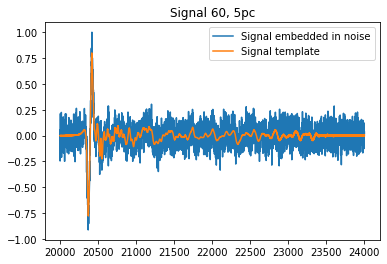

In [96]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 60, 5pc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for table 1

In [97]:
#pywt.wavelist()

In [98]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym5','db13','coif1']
sym_wavelets = ['sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',
 'sym14',
 'sym15',
 'sym16',
 'sym17',
 'sym18',
 'sym19',
 'sym20']
levels = np.arange(1,7,1)
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 60'
signaldistance = '5 kpc'

Create a main list that appends each line and each metric result

In [100]:
main_list = []

for m in methods:
  cols = []
  for i in range(len(sym_wavelets)):
    for l in range(len(levels)):
      #Make a dataframe for the denoised signal of the noisy normalized signal
      denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = sym_wavelets[i], wavelet_levels = levels[l], rescale_sigma = 'True'))
      
      #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
      col1 = [str(m).upper() +', '+ sym_wavelets[i] + ' level ' + str(levels[l])] 
      col1.append(get_rmse(signal_norm_df, denoised_df))
      col1.append(mean_absolute_error(signal_norm_df, denoised_df))
      col1.append(max_error(signal_norm_df, denoised_df))

      #append this column to cols- a list of columns for the table 
      cols.append(col1)
  main_list.append(cols)

In [101]:
main_array = np.array(main_list)

In [103]:
main_array.shape

(2, 114, 4)

In [105]:
main_array[:,:,0]

array([['BAYESSHRINK, sym2 level 1', 'BAYESSHRINK, sym2 level 2',
        'BAYESSHRINK, sym2 level 3', 'BAYESSHRINK, sym2 level 4',
        'BAYESSHRINK, sym2 level 5', 'BAYESSHRINK, sym2 level 6',
        'BAYESSHRINK, sym3 level 1', 'BAYESSHRINK, sym3 level 2',
        'BAYESSHRINK, sym3 level 3', 'BAYESSHRINK, sym3 level 4',
        'BAYESSHRINK, sym3 level 5', 'BAYESSHRINK, sym3 level 6',
        'BAYESSHRINK, sym4 level 1', 'BAYESSHRINK, sym4 level 2',
        'BAYESSHRINK, sym4 level 3', 'BAYESSHRINK, sym4 level 4',
        'BAYESSHRINK, sym4 level 5', 'BAYESSHRINK, sym4 level 6',
        'BAYESSHRINK, sym5 level 1', 'BAYESSHRINK, sym5 level 2',
        'BAYESSHRINK, sym5 level 3', 'BAYESSHRINK, sym5 level 4',
        'BAYESSHRINK, sym5 level 5', 'BAYESSHRINK, sym5 level 6',
        'BAYESSHRINK, sym6 level 1', 'BAYESSHRINK, sym6 level 2',
        'BAYESSHRINK, sym6 level 3', 'BAYESSHRINK, sym6 level 4',
        'BAYESSHRINK, sym6 level 5', 'BAYESSHRINK, sym6 level 6',
        'B

In [55]:
dataa = {}

for i in range(3):
  dataa {main_list[i]:}

TypeError: ignored

In [59]:
type(data)

dict

FLAG: Loop through **data** dictionary (below)

In [58]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table1_df = pd.DataFrame(data)
 
# Print the output.
Table1_df

,signal 60 at 5 kpc,"BAYESSHRINK, sym2 level 1","BAYESSHRINK, sym2 level 2","BAYESSHRINK, sym2 level 3","VISUSHRINK, sym2 level 1","VISUSHRINK, sym2 level 2","VISUSHRINK, sym2 level 3"
0,RMSE,0.053165,0.038247,0.028020,0.053165,0.038247,0.028020
1,MAE,0.041566,0.029764,0.021932,0.041566,0.029764,0.021932
2,MAX,0.222191,0.184373,0.110789,0.222191,0.184373,0.110789


In [ ]:
denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = , wavelet_levels = levels[i], rescale_sigma = 'True')

array([-0.01353462, -0.01392688, -0.01446522, ...,  0.01192287,
        0.01206634,  0.01220727])

In [ ]:
denoise_wavelet?

In [ ]:
print(pywt.wavelist)

<built-in function wavelist>


In [ ]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',